TEAM ID:PNT2022TMID06256

In [ ]:
import numpy

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
from tensorflow.keras.layers import Conv2D

In [ ]:
from keras.optimizers import Adam

In [ ]:
from keras.utils import np_utils

# load data

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(x_test.shape)

(10000, 28, 28)


# understanding the data

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

In [ ]:
import matplotlib.pyplot as plt

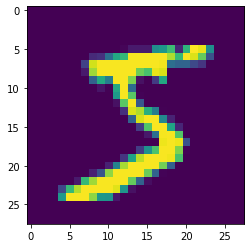

In [ ]:
plt.imshow(x_train[0])

# Reshaping Dataset

In [ ]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')

In [ ]:
x_test=x_test.reshape(10000,28,28,1).astype('float32')

# Applying One Hot Encoding

In [ ]:
number_of_classes = 10

In [ ]:
y_train = np_utils.to_categorical(y_train, number_of_classes)

In [ ]:
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# create the model

In [ ]:
model=Sequential()


In [ ]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu'))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(number_of_classes,activation="softmax"))

# Compiling the model


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

# Train The Model(fitting the model)

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 149s 79ms/step - loss: 0.1771 - accuracy: 0.9560 - val_loss: 0.0854 - val_accuracy: 0.9742
Epoch 2/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0629 - accuracy: 0.9809 - val_loss: 0.0772 - val_accuracy: 0.9777
Epoch 3/5
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0469 - accuracy: 0.9856 - val_loss: 0.0952 - val_accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 151s 81ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0887 - val_accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0253 - accuracy: 0.9922 - val_loss: 0.1195 - val_accuracy: 0.9781


# Observing the metrics

In [ ]:
metrics=model.evaluate(x_test,y_test,verbose=0)

In [ ]:
print("Mertics(Test loss & Test Accuracy):")
print(metrics)

Mertics(Test loss & Test Accuracy):
[0.11946097761392593, 0.9781000018119812]


# Test the model

In [ ]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 227ms/step
[[8.7969666e-17 6.5749984e-22 8.5030195e-14 2.4459026e-09 1.0123269e-25
  6.6197198e-22 1.9805131e-25 1.0000000e+00 9.7074760e-14 1.4007216e-13]
 [1.1095469e-09 1.3468847e-15 1.0000000e+00 3.5912609e-15 3.4516151e-22
  4.2462901e-21 1.8621271e-11 4.1449071e-27 3.8956200e-13 3.7019410e-22]
 [1.1927103e-08 9.9998760e-01 2.6663010e-09 1.4025115e-13 2.7118290e-06
  6.0289194e-06 4.7341229e-09 8.6994284e-10 3.5885453e-06 3.6283821e-15]
 [1.0000000e+00 6.0646924e-20 4.6409980e-11 8.5558025e-16 4.2709407e-18
  6.5854298e-14 2.3410943e-11 1.3389890e-17 8.3984841e-16 2.1590561e-10]]


# Observing the metrics

In [ ]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Mertics(Test loss & Test Accuracy):")
print(metrics)

Mertics(Test loss & Test Accuracy):
[0.11946097761392593, 0.9781000018119812]


# Test the model

In [ ]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 44ms/step
[[8.7969666e-17 6.5749984e-22 8.5030195e-14 2.4459026e-09 1.0123269e-25
  6.6197198e-22 1.9805131e-25 1.0000000e+00 9.7074760e-14 1.4007216e-13]
 [1.1095469e-09 1.3468847e-15 1.0000000e+00 3.5912609e-15 3.4516151e-22
  4.2462901e-21 1.8621271e-11 4.1449071e-27 3.8956200e-13 3.7019410e-22]
 [1.1927103e-08 9.9998760e-01 2.6663010e-09 1.4025115e-13 2.7118290e-06
  6.0289194e-06 4.7341229e-09 8.6994284e-10 3.5885453e-06 3.6283821e-15]
 [1.0000000e+00 6.0646924e-20 4.6409980e-11 8.5558025e-16 4.2709407e-18
  6.5854298e-14 2.3410943e-11 1.3389890e-17 8.3984841e-16 2.1590561e-10]]


# save the model

In [ ]:
model.save('models/mnistCNN.h5')

# test with the saved model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model=load_model(r'C:\Users\nithy\models\mnistCNN.h5')

In [ ]:
from PIL import Image

In [ ]:
import numpy as np

In [ ]:
for index in range(4):
    img=Image.open('C:/Users/nithy/'+str(index)+'.png').convert("L")
    img=img.resize((28,28))
    im2arr=np.array(img)
    im2arr=im2arr.reshape(1,28,28,1)
    y_pred=model.predict(im2arr)
    print(y_pred)

1/1 [==============================] - 0s 100ms/step
[[0.12043309 0.05673093 0.0898339  0.04713611 0.05784901 0.129515
  0.12116217 0.03154609 0.17173983 0.17405385]]
1/1 [==============================] - 0s 27ms/step
[[0.14496574 0.02907675 0.26663652 0.30270296 0.04957851 0.00391167
  0.01174463 0.01210053 0.09836391 0.08091882]]
1/1 [==============================] - 0s 26ms/step
[[2.7074435e-01 1.4534253e-06 3.5935082e-02 4.8260731e-01 1.6597639e-08
  2.3826435e-03 1.4896087e-08 8.0592217e-05 8.1928022e-04 2.0742917e-01]]
1/1 [==============================] - 0s 27ms/step
[[2.8176487e-07 1.7496832e-01 3.0965906e-02 7.7877840e-04 5.1893014e-08
  6.0884264e-05 5.3804876e-09 1.8368025e-01 6.0953349e-01 1.2035665e-05]]
